### Three-level Lambda Atom Coupled to a Waveguide


In [47]:
from cmath import exp
from math import pi
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import time
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams.update({'font.size': 20})
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [48]:
plt.rcParams.update({'font.size': 15})

# Two-way

Define transmission and reflection in terms of energy (not frequency - E is conserved but k is not)

In [49]:
def trans1(E2,E,vg,g1,g3,dephasing):
    """
    transmission of three-level atom through atom |1>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return 1 - (g1**2)/(1j*(E2-E)*vg + g1**2 + g3**2 +dephasing)

def ref1(E2,E,vg,g1,g3,dephasing):
    """
    reflection of three-level atom through atom |1>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1**2)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def trans3(E2,E,vg,g1,g3,dephasing):
    """
    transmission of three-level atom through atom |3>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1*g3)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def ref3(E2,E,vg,g1,g3,dephasing):
    """
    reflection of three-level atom through atom |3>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1*g3)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def trans1p(E2,E,vg,g1,g3,dephasing):
    """
    transmission of three-level atom through atom |1>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g1*g3)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def ref1p(E2,E,vg,g1,g3,dephasing):
    """
    reflection of three-level atom through atom |1>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g1*g3)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def trans3p(E2,E,vg,g1,g3,dephasing):
    """
    transmission of three-level atom through atom |3>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return 1 - (g3**2)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)

def ref3p(E2,E,vg,g1,g3,dephasing):
    """
    reflection of three-level atom through atom |3>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g3**2)/(1j*(E2-E)*vg + g1**2 + g3**2+dephasing)


in terms of frequency

In [50]:
def trans1k(E2,E1,k,vg,g1,g3):
    """
    transmission of three-level atom through atom |1>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return 1 - (g1**2)/(1j*(E2-E1-vg*k)*vg + g1**2 + g3**2)

def ref1k(E2,E1,k,vg,g1,g3):
    """
    reflection of three-level atom through atom |1>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1**2)/(1j*(E2-E1-vg*k)*vg + g1**2 + g3**2)

def trans3k(E2,E1,k,vg,g1,g3):
    """
    transmission of three-level atom through atom |3>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1*g3)/(1j*(E2-E1-vg*k)*vg + g1**2 + g3**2)

def ref3k(E2,E1,k,vg,g1,g3):
    """
    reflection of three-level atom through atom |3>, with atom initially in |1>
    """
    # E is total energy (E=E1+Ephoton)
    return - (g1*g3)/(1j*(E2-E1-vg*k)*vg + g1**2 + g3**2)

def trans1pk(E2,E3,k,vg,g1,g3):
    """
    transmission of three-level atom through atom |1>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g1*g3)/(1j*(E2-E3-vg*k)*vg + g1**2 + g3**2)

def ref1pk(E2,E3,k,vg,g1,g3):
    """
    reflection of three-level atom through atom |1>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g1*g3)/(1j*(E2-E3-vg*k)*vg + g1**2 + g3**2)

def trans3pk(E2,E3,k,vg,g1,g3):
    """
    transmission of three-level atom through atom |3>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return 1 - (g3**2)/(1j*(E2-E3-vg*k)*vg + g1**2 + g3**2)

def ref3pk(E2,E3,k,vg,g1,g3):
    """
    reflection of three-level atom through atom |3>, with atom initially in |3>
    """
    # E is total energy (E=E3+Ephoton)
    return - (g3**2)/(1j*(E2-E3-vg*k)*vg + g1**2 + g3**2)


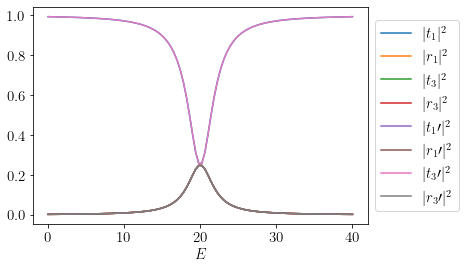

In [51]:
# Define variables
E2=20
E1=0
E3=10
Delta=E3-E1
vg = 1
g1 = 1
g3 = 1
A, B = 1/np.sqrt(2), 1/np.sqrt(2)
C, D = 1/np.sqrt(2), 1/np.sqrt(2)
phi_a = 0
phi_p = 0
dephasing=0


# Define plot range
phi_p_min = -2*pi
phi_p_max = 2*pi

steps = 100
E_array_min = 0
E_array_max = 40
E_array = np.linspace(E_array_min, E_array_max, 100)

#plot from analytical
plt.plot(E_array,[abs(trans1(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|t_1|^2$')
plt.plot(E_array,[abs(ref1(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|r_1|^2$')
plt.plot(E_array,[abs(trans3(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|t_3|^2$')
plt.plot(E_array,[abs(ref3(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|r_3|^2$')
plt.plot(E_array,[abs(trans1p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|t_1\prime|^2$')
plt.plot(E_array,[abs(ref1p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|r_1\prime|^2$')
plt.plot(E_array,[abs(trans3p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|t_3\prime|^2$')
plt.plot(E_array,[abs(ref3p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array], label= '$|r_3\prime|^2$')
plt.xlabel("$E$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Nondegenerate case

Plot transmission and reflection for single atom as a function of k

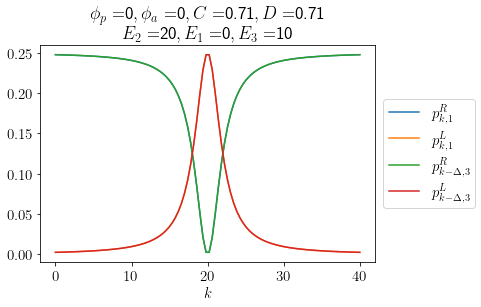

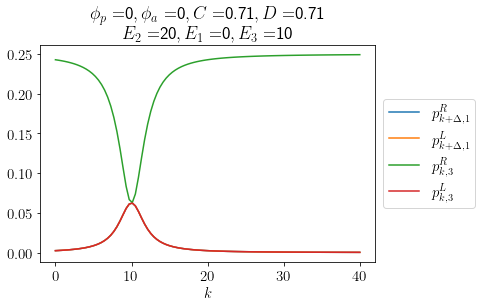

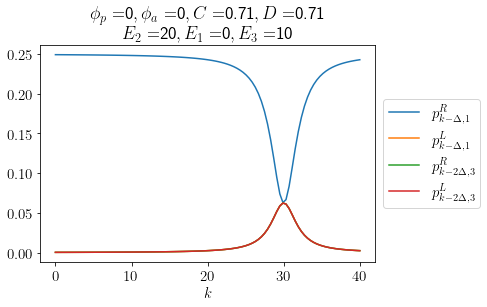

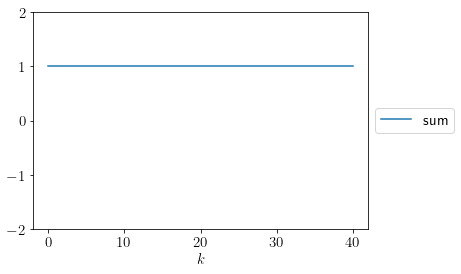

In [52]:
# Define variables
E2=20
E1=0
E3=10
Delta=E3-E1
vg = 1
g1 = 1
g3 = 1
A, B = 1/np.sqrt(2), 1/np.sqrt(2)
C, D = 1/np.sqrt(2), 1/np.sqrt(2)
phi_a = 0
phi_p = 0


# Define plot range
phi_p_min = -2*pi
phi_p_max = 2*pi

steps = 100
k_array_min = 0
k_array_max = 40
k_array = np.linspace(k_array_min, k_array_max, 100)


#plot from analytical
amp1 = A*C
amp2 = A*D*exp(1j*phi_a)
amp3 = B*C*exp(1j*phi_p)
amp4 = B*D*exp(1j*(phi_a+phi_p))
# Ea : k, E1 
# Eb : k, E3
# Ec : k-Delta, E1
# Ed : k-Delta, E3

#Energy subspace A and D
p_k_1R=[abs(A*C*trans1k(E2,E1,k,vg,g1,g3) + B*D*exp(1j*(phi_a+phi_p))*trans1pk(E2,E3,k-Delta,vg,g1,g3))**2 for k in k_array]
p_k_1L=[abs(A*C*ref1k(E2,E1,k,vg,g1,g3) + B*D*exp(1j*(phi_a+phi_p))*ref1pk(E2,E3,k-Delta,vg,g1,g3))**2 for k in k_array]
p_kmD_3R=[abs(A*C*trans3k(E2,E1,k,vg,g1,g3) + B*D*exp(1j*(phi_a+phi_p))*trans3pk(E2,E3,k-Delta,vg,g1,g3))**2 for k in k_array]
p_kmD_3L=[abs(A*C*ref3k(E2,E1,k,vg,g1,g3) + B*D*exp(1j*(phi_a+phi_p))*ref3pk(E2,E3,k-Delta,vg,g1,g3))**2 for k in k_array]
#Energy subspace B
p_kpD_1R=[abs(A*D*exp(1j*phi_a)*trans1pk(E2,E3,k,vg,g1,g3))**2 for k in k_array]
p_kpD_1L=[abs(A*D*exp(1j*phi_a)*ref1pk(E2,E3,k,vg,g1,g3))**2 for k in k_array]
p_k_3R=[abs(A*D*exp(1j*phi_a)*trans3pk(E2,E3,k,vg,g1,g3))**2 for k in k_array]
p_k_3L=[abs(A*D*exp(1j*phi_a)*ref3pk(E2,E3,k,vg,g1,g3))**2 for k in k_array]
#Energy subspace C
p_kmD_1R=[abs(B*C*exp(1j*phi_p)*trans1k(E2,E1,k-Delta,vg,g1,g3))**2 for k in k_array]
p_kmD_1L=[abs(B*C*exp(1j*phi_p)*ref1k(E2,E1,k-Delta,vg,g1,g3))**2 for k in k_array]
p_km2D_3R=[abs(B*C*exp(1j*phi_p)*trans3k(E2,E1,k-Delta,vg,g1,g3))**2 for k in k_array]
p_km2D_3L=[abs(B*C*exp(1j*phi_p)*ref3k(E2,E1,k-Delta,vg,g1,g3))**2 for k in k_array]

#Energy subspace A and D
plt.plot(k_array,p_k_1R, label= '$p_{k,1}^R$')
plt.plot(k_array,p_k_1L, label= '$p_{k,1}^L$')
plt.plot(k_array,p_kmD_3R, label= '$p_{k-\Delta,3}^R$')
plt.plot(k_array,p_kmD_3L, label= '$p_{k-\Delta,3}^L$')
plt.xlabel("$k$")
plt.title("$\phi_p=$"+str(round(phi_p,2))+"$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#Energy subspace B
plt.plot(k_array,p_kpD_1R, label= '$p_{k+\Delta,1}^R$')
plt.plot(k_array,p_kpD_1L, label= '$p_{k+\Delta,1}^L$')
plt.plot(k_array,p_k_3R, label= '$p_{k,3}^R$')
plt.plot(k_array,p_k_3L, label= '$p_{k,3}^L$')
plt.xlabel("$k$")
plt.title("$\phi_p=$"+str(round(phi_p,2))+"$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#Energy subspace C
plt.plot(k_array,p_kmD_1R, label= '$p_{k-\Delta,1}^R$')
plt.plot(k_array,p_kmD_1L, label= '$p_{k-\Delta,1}^L$')
plt.plot(k_array,p_km2D_3R, label= '$p_{k-2\Delta,3}^R$')
plt.plot(k_array,p_km2D_3L, label= '$p_{k-2\Delta,3}^L$')
plt.xlabel("$k$")
plt.title("$\phi_p=$"+str(round(phi_p,2))+"$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

lists_of_lists = [p_k_1R,p_k_1L,p_kmD_3R,p_kmD_3L,\
                  p_kpD_1R,p_kpD_1L,p_k_3R,p_k_3L,\
                 p_kmD_1R, p_kmD_1L, p_km2D_3R,p_km2D_3L]
sumarray = [sum(x) for x in zip(*lists_of_lists)]
plt.plot(k_array,sumarray, label= 'sum')
plt.ylim([-2,2])
plt.xlabel("$k$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Figure for paper

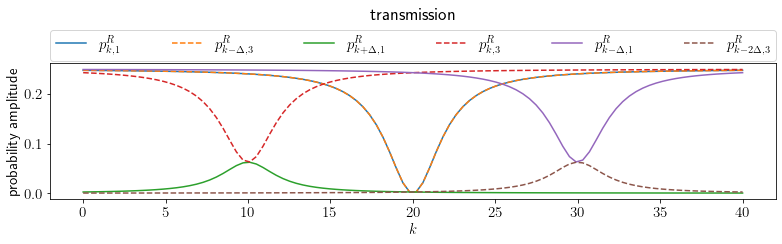

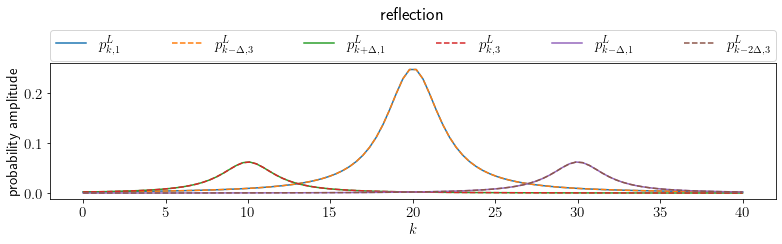

In [53]:
plt.rcParams.update({'font.size': 15})
rc('text', usetex=True)

plt.figure(figsize=(13,2.5))
# plot transmissions
plt.plot(k_array,p_k_1R, label= '$p_{k,1}^R$')
plt.plot(k_array,p_kmD_3R,'--', label= '$p_{k-\Delta,3}^R$')
plt.plot(k_array,p_kpD_1R, label= '$p_{k+\Delta,1}^R$')
plt.plot(k_array,p_k_3R,'--', label= '$p_{k,3}^R$')
plt.plot(k_array,p_kmD_1R, label= '$p_{k-\Delta,1}^R$')
plt.plot(k_array,p_km2D_3R, '--',label= '$p_{k-2\Delta,3}^R$')
plt.xlabel("$k$")
plt.ylabel("probability amplitude")
plt.title("transmission",y=1.28)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=6)
plt.show()

plt.figure(figsize=(13,2.5))
# plot reflections
plt.plot(k_array,p_k_1L, label= '$p_{k,1}^L$')
plt.plot(k_array,p_kmD_3L, '--',label= '$p_{k-\Delta,3}^L$')
plt.plot(k_array,p_kpD_1L, label= '$p_{k+\Delta,1}^L$')
plt.plot(k_array,p_k_3L, '--',label= '$p_{k,3}^L$')
plt.plot(k_array,p_kmD_1L, label= '$p_{k-\Delta,1}^L$')
plt.plot(k_array,p_km2D_3L, '--',label= '$p_{k-2\Delta,3}^L$')
plt.xlabel("$k$")
plt.ylabel("probability amplitude")
plt.title("reflection",y=1.28)
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=6)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(frameon=False, loc='upper left')
plt.show()


Figure for paper. Transmission spectra of interference term for two phi_p values

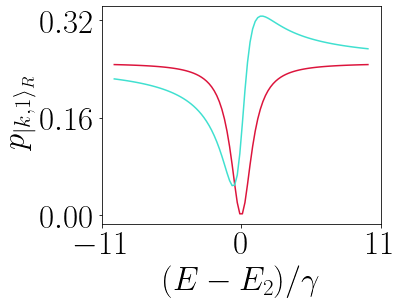

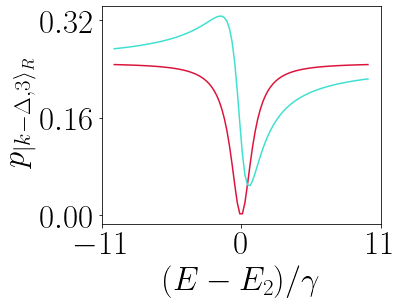

In [54]:
E_array_min = 0
E_array_max = 40
E_array = np.linspace(E_array_min, E_array_max, 100)
dephasing = 0

def plot_interference_trans(phi_p):
    phi_p = phi_p
    # Define plot range
    steps = 100
    E_array_min = 0
    E_array_max = 40
    E_array = np.linspace(E_array_min, E_array_max, 100)
    #plot from analytical
    amp1 = A*C
    amp2 = A*D*exp(1j*phi_a)
    amp3 = B*C*exp(1j*phi_p)
    amp4 = B*D*exp(1j*(phi_a+phi_p))
    #Energy subspace A and D
    p_k_1R=[abs(A*C*trans1(E2,E,vg,g1,g3,dephasing) + B*D*exp(1j*(phi_a+phi_p))*trans1p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array]
    p_kmD_3R=[abs(A*C*trans3(E2,E,vg,g1,g3,dephasing) + B*D*exp(1j*(phi_a+phi_p))*trans3p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array]
    return p_k_1R, p_kmD_3R
    

p_k_1Rexample1, p_kmD_3R_example1 = plot_interference_trans(0)   
p_k_1Rexample2, p_kmD_3R_example2 = plot_interference_trans(pi/2)   

plt.rcParams.update({'font.size': 33})

plt.figure(figsize=(5,4))
# plot transmissions
#the factor of /2 in E is because we renormalize using gamma1+gamma3=2
plt.plot((E_array-E2)/2,p_k_1Rexample1, label= '$\phi_p= 0$',c='crimson')
plt.plot((E_array-E2)/2,p_k_1Rexample2, label= '$\phi_p= \pi/2$',c='turquoise')
#set number of ticks
#ymin, ymax = plt.gca().get_ylim()
#plt.yticks(np.round(np.linspace(ymin, ymax, 3), 2))
plt.yticks(np.round(np.linspace(0, 0.32, 3), 2))
xmin, xmax = plt.gca().get_xlim()
plt.xticks(np.round(np.linspace(xmin, xmax, 3), 2))
plt.xlabel(" $(E -E_2)/\gamma$")
plt.ylabel(r" $p_{|k,1\rangle_R}$")
#plt.title("transmission through $|1 \rangle$")
#plt.legend(frameon=False, loc='lower left')
#plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                mode="expand", borderaxespad=0, ncol=6,handlelength=0.5)
plt.show()

plt.figure(figsize=(5,4))
plt.plot((E_array-E2)/2,p_kmD_3R_example1, label= '$\phi_p = 0$',c='crimson')
plt.plot((E_array-E2)/2,p_kmD_3R_example2, label= '$\phi_p= \pi/2$',c='turquoise')
#set number of ticks
#ymin, ymax = plt.gca().get_ylim()
#plt.yticks(np.round(np.linspace(ymin, ymax, 3), 2))
plt.yticks(np.round(np.linspace(0, 0.32, 3), 2))
xmin, xmax = plt.gca().get_xlim()
plt.xticks(np.round(np.linspace(xmin, xmax, 3), 2))
plt.xlabel(" $(E -E_2)/\gamma$")
plt.ylabel(r" $p_{|k-\Delta,3\rangle_R}$")
#plt.title("transmission through $|3\rangle$")
#plt.legend(frameon=False, loc='lower left')
#plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#                mode="expand", borderaxespad=0, ncol=6,handlelength=0.5)
plt.show()



Plot transmission and reflection as a function of phi_p for single atom

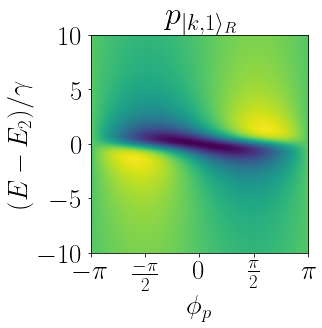

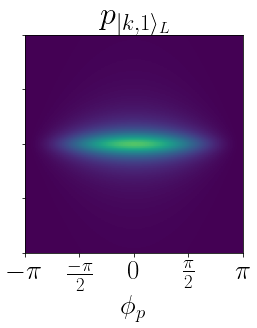

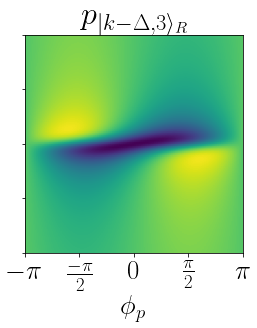

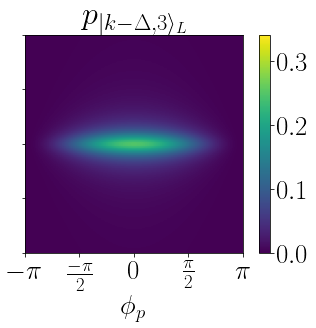

In [55]:
phi_pp_min = -pi
phi_pp_max = pi
E_array_min = 0
E_array_max = 40
aspect = (phi_pp_max-phi_pp_min)/(0.5*(E_array_max-E_array_min))# for plotting imshow

# Define variables
E2=20
E1=0
E3=10
Delta=E3-E1
vg = 1
g1 = 1
g3 = 1
A, B = 1/np.sqrt(2), 1/np.sqrt(2)
C, D = 1/np.sqrt(2), 1/np.sqrt(2)
dephasing = 0


# Define plot range
phi_p_min = -2*pi
phi_p_max = 2*pi

phi_pp = np.linspace(phi_pp_min, phi_pp_max, 100)
E_array = np.linspace(E_array_min,E_array_max, 100)


# FROM BEFORE, DELETE LATER
# #plot from analytical
amp1 = A*C
amp2 = A*D*exp(1j*phi_a)
amp3 = B*C*exp(1j*phi_p)
amp4 = B*D*exp(1j*(phi_a+phi_p))
# Ea : k, E1 
# Eb : k, E3
# Ec : k-Delta, E1
# Ed : k-Delta, E3


#Energy subspace A and D
p_k_1R_array_allphi, p_k_1L_array_allphi, p_kmD_3R_array_allphi, p_kmD_3L_array_allphi = [], [], [], []
# #Energy subspace B
p_kpD_1R_array_allphi, p_kpD_1L_array_allphi, p_k_3R_array_allphi, p_k_3L_array_allphi = [], [], [], []
# #Energy subspace C
p_kmD_1R_array_allphi, p_kmD_1L_array_allphi, p_km2D_3R_array_allphi, p_km2D_3L_array_allphi = [], [], [], []
for phi_p in phi_pp:
    p_k_1R_array, p_k_1L_array, p_kmD_3R_array, p_kmD_3L_array = [], [], [], []
    p_kpD_1R_array, p_kpD_1L_array, p_k_3R_array, p_k_3L_array  = [], [], [], []
    p_kmD_1R_1R, p_kmD_1L_array, p_km2D_3R_array, p_km2D_3L_array = [], [], [], []
    i, j = 0, 0
    for E in E_array:
        amp1 = A*C
        amp2 = A*D*exp(1j*phi_a)
        amp3 = B*C*exp(1j*phi_p)
        amp4 = B*D*exp(1j*(phi_a+phi_p))
        p_k_1R = abs(A*C*trans1(E2,E,vg,g1,g3,dephasing)+\
           B*D*exp(1j*(phi_a+phi_p))*trans1p(E2,E,vg,g1,g3,dephasing))**2
        p_k_1L = abs(A*C*ref1(E2,E,vg,g1,g3,dephasing)+\
           B*D*exp(1j*(phi_a+phi_p))*ref1p(E2,E,vg,g1,g3,dephasing))**2
        p_kmD_3R = abs(A*C*trans3(E2,E,vg,g1,g3,dephasing)+\
             B*D*exp(1j*(phi_a+phi_p))*trans3p(E2,E,vg,g1,g3,dephasing))**2
        p_kmD_3L = abs(A*C*ref3(E2,E,vg,g1,g3,dephasing)+\
             B*D*exp(1j*(phi_a+phi_p))*ref3p(E2,E,vg,g1,g3,dephasing))**2
        p_kpD_1R = abs(A*D*exp(1j*phi_a)*trans1p(E2,E,vg,g1,g3,dephasing))**2
        p_kpD_1L = abs(A*D*exp(1j*phi_a)*ref1p(E2,E,vg,g1,g3,dephasing))**2
        p_k_3R = abs(A*D*exp(1j*phi_a)*trans3p(E2,E,vg,g1,g3,dephasing))**2
        p_k_3L = abs(A*D*exp(1j*phi_a)*ref3p(E2,E,vg,g1,g3,dephasing))**2
        p_kmD_1R = abs( B*C*exp(1j*phi_p)*trans1(E2,E,vg,g1,g3,dephasing))**2
        p_kmD_1L = abs( B*C*exp(1j*phi_p)*ref1(E2,E,vg,g1,g3,dephasing))**2
        p_km2D_3R = abs( B*C*exp(1j*phi_p)*trans3(E2,E,vg,g1,g3,dephasing))**2
        p_km2D_3L = abs( B*C*exp(1j*phi_p)*ref3(E2,E,vg,g1,g3,dephasing))**2
        p_k_1R_array.append(p_k_1R)
        p_k_1L_array.append(p_k_1L)
        p_kmD_3R_array.append(p_kmD_3R)
        p_kmD_3L_array.append(p_kmD_3L)
        p_kpD_1R_array.append(p_kpD_1R)
        p_kpD_1L_array.append(p_kpD_1L)
        p_k_3R_array.append(p_k_3R)
        p_k_3L_array.append(p_k_3L)
        p_kmD_1R_1R.append(p_kmD_1R)
        p_kmD_1L_array.append(p_kmD_1L)
        p_km2D_3R_array.append(p_km2D_3R)
        p_km2D_3L_array.append(p_km2D_3L)
    p_k_1R_array_allphi.append(p_k_1R_array)
    p_k_1L_array_allphi.append(p_k_1L_array)
    p_kmD_3R_array_allphi.append(p_kmD_3R_array)
    p_kmD_3L_array_allphi.append(p_kmD_3L_array)
    p_kpD_1R_array_allphi.append(p_kpD_1R_array)
    p_kpD_1L_array_allphi.append(p_kpD_1L_array)
    p_k_3R_array_allphi.append(p_k_3R_array)
    p_k_3L_array_allphi.append(p_k_3L_array)
    p_kmD_1R_array_allphi.append(p_kmD_1R_1R)
    p_kmD_1L_array_allphi.append(p_kmD_1L_array)
    p_km2D_3R_array_allphi.append(p_km2D_3R_array)
    p_km2D_3L_array_allphi.append(p_km2D_3L_array)
        

plt.rcParams.update({'font.size': 27})

# Energy subspace A and D
ax = plt.gca()
plt.imshow(np.real(p_k_1R_array_allphi).T,origin='lower',extent=[-pi,pi,(E_array_min-20)/2,(E_array_max-20)/2],vmin=0.0, vmax=0.34,aspect=aspect)
#plt.axvline(x=0,color='crimson',linestyle='--')
#plt.axvline(x=pi/2,color='cyan',linestyle='--')
#plt.axhline(y=20,color='r',linestyle='--')
plt.xlabel(" $\phi_p$")
plt.ylabel(" $(E -E_2)/\gamma$")
plt.title(r" $p_{|k,1\rangle_R}$")
ax.axes.xaxis.set_ticks([-pi,-pi/2,0,pi/2,pi])
ax.axes.xaxis.set_ticklabels([r'$-\pi$',r'$\frac{-\pi}{2}$','$0$',r'$\frac{\pi}{2}$','$\pi$'])
#plt.colorbar()
plt.show()
ax = plt.gca()
plt.imshow(np.real(p_k_1L_array_allphi).T,origin='lower',extent=[-pi,pi,(E_array_min-20)/2,(E_array_max-20)/2],vmin=0.0, vmax=0.34,aspect=aspect)
plt.xlabel("$\phi_p$")
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticks([-pi,-pi/2,0,pi/2,pi])
ax.axes.xaxis.set_ticklabels([r'$-\pi$',r'$\frac{-\pi}{2}$','$0$',r'$\frac{\pi}{2}$','$\pi$'])
plt.title(r" $p_{|k,1\rangle_L}$")
#plt.colorbar()
plt.show()
ax = plt.gca()
plt.imshow(np.real(p_kmD_3R_array_allphi).T,origin='lower',extent=[-pi,pi,(E_array_min-20)/2,(E_array_max-20)/2],vmin=0.0, vmax=0.34,aspect=aspect)
#plt.yticks([])
#plt.axvline(x=0,color='crimson',linestyle='--')
#plt.axvline(x=pi/2,color='cyan',linestyle='--')
plt.xlabel("$\phi_p$")
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticks([-pi,-pi/2,0,pi/2,pi])
ax.axes.xaxis.set_ticklabels([r'$-\pi$',r'$\frac{-\pi}{2}$','$0$',r'$\frac{\pi}{2}$','$\pi$'])
plt.title(r" $p_{|k-\Delta,3\rangle_R}$")
#plt.colorbar()
plt.show()
ax = plt.gca()
plt.imshow(np.real(p_kmD_3L_array_allphi).T,origin='lower',extent=[-pi,pi,(E_array_min-20)/2,(E_array_max-20)/2],vmin=0.0, vmax=0.34,aspect=aspect)
plt.xlabel("$\phi_p$")
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticks([-pi,-pi/2,0,pi/2,pi])
ax.axes.xaxis.set_ticklabels([r'$-\pi$',r'$\frac{-\pi}{2}$','$0$',r'$\frac{\pi}{2}$','$\pi$'])
plt.title(r" $p_{|k-\Delta,3\rangle_L}$")
plt.colorbar()
plt.show()



In [56]:
np.max(np.real(p_k_1R_array_allphi))

0.33308455299170836

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


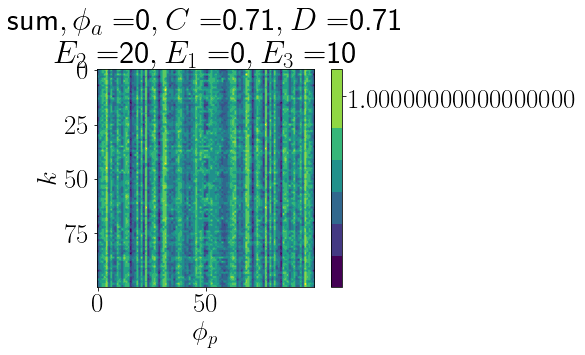

In [57]:
sum2Darray = np.array(p_k_1R_array_allphi) + np.array(p_k_1L_array_allphi) +\
np.array(p_kmD_3R_array_allphi) + np.array(p_kmD_3L_array_allphi) +\
np.array(p_kpD_1R_array_allphi) + np.array(p_kpD_1L_array_allphi) +\
np.array(p_k_3R_array_allphi) + np.array(p_k_3L_array_allphi) +\
np.array(p_kmD_1R_array_allphi) + np.array(p_kmD_1L_array_allphi)+\
np.array(p_km2D_3R_array_allphi) + np.array(p_km2D_3L_array_allphi)
print(sum2Darray)
plt.imshow(sum2Darray)
plt.xlabel("$\phi_p$")
plt.ylabel("$k$")
plt.title("sum$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.colorbar()
plt.show()


[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


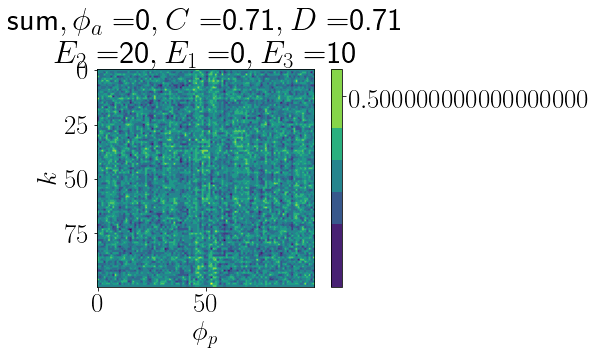

In [58]:
sum2Darray = np.array(p_k_1R_array_allphi) + np.array(p_k_1L_array_allphi) +\
np.array(p_kmD_3R_array_allphi) + np.array(p_kmD_3L_array_allphi) 
print(sum2Darray)
plt.imshow(sum2Darray)
plt.xlabel("$\phi_p$")
plt.ylabel("$k$")
plt.title("sum$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.colorbar()
plt.show()


[[0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 ...
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]]


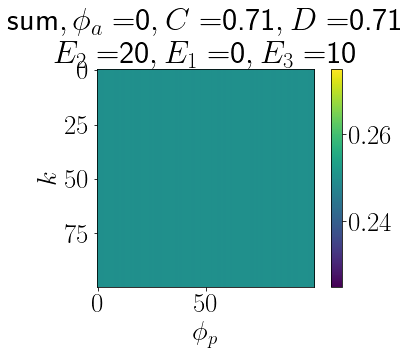

In [59]:
sum2Darray = np.array(p_kpD_1R_array_allphi) + np.array(p_kpD_1L_array_allphi) +\
np.array(p_k_3R_array_allphi) + np.array(p_k_3L_array_allphi) 
print(sum2Darray)
plt.imshow(sum2Darray)
plt.xlabel("$\phi_p$")
plt.ylabel("$k$")
plt.title("sum$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.colorbar()
plt.show()


[[0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 ...
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]]


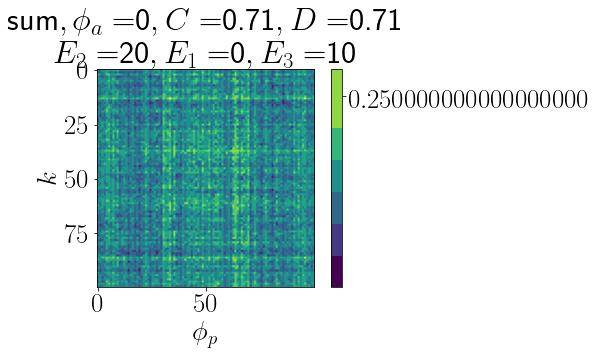

In [60]:
sum2Darray = np.array(p_kmD_1R_array_allphi) + np.array(p_kmD_1L_array_allphi)+\
np.array(p_km2D_3R_array_allphi) + np.array(p_km2D_3L_array_allphi)
print(sum2Darray)
plt.imshow(sum2Darray)
plt.xlabel("$\phi_p$")
plt.ylabel("$k$")
plt.title("sum$, \phi_a=$"+str(round(phi_a,2))+"$, C=$"+str(round(C,2))+"$, D=$"+str(round(D,2))+\
          "\n $E_2 = $"+str(E2)+"$, E_1 = $"+str(E1)+"$, E_3 = $"+str(E3))
plt.colorbar()
plt.show()


# Adding random fluctuations in resonance energy

peak size is 0.24499975500024493
decrease is 0.0


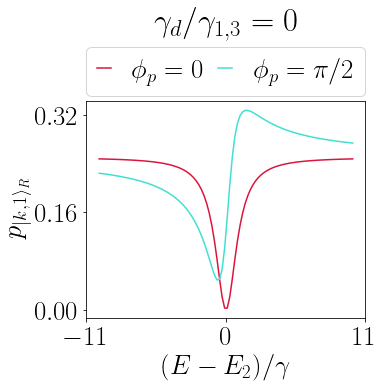

peak size is 0.23475067254083973
decrease is 0.04183303146321495


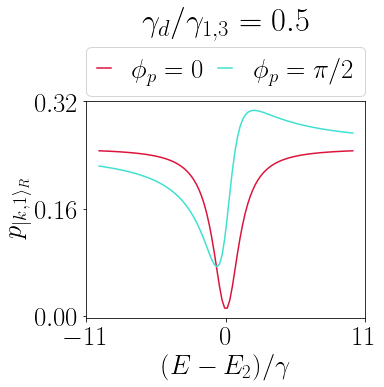

peak size is 0.21632908797615602
decrease is 0.11702324773369771


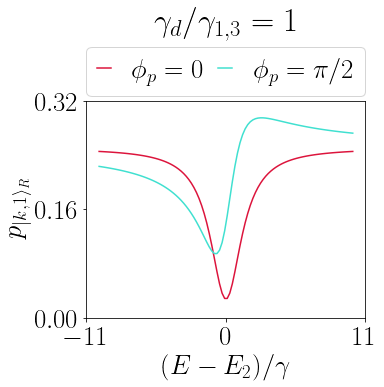

peak size is 0.17981141085659708
decrease is 0.26607514013057965


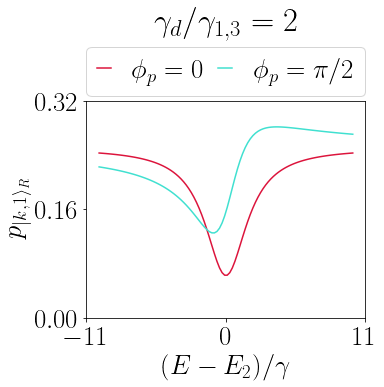

In [61]:
for dephasing in [0, 0.5, 1,2]:
    E_array_min = 0
    E_array_max = 40
    E_array = np.linspace(E_array_min, E_array_max, 100)

    def plot_interference_trans(phi_p):
        phi_p = phi_p
        # Define plot range
        steps = 100
        E_array_min = 0
        E_array_max = 40
        E_array = np.linspace(E_array_min, E_array_max, 100)
        #plot from analytical
        amp1 = A*C
        amp2 = A*D*exp(1j*phi_a)
        amp3 = B*C*exp(1j*phi_p)
        amp4 = B*D*exp(1j*(phi_a+phi_p))
        #Energy subspace A and D
        p_k_1R=[abs(A*C*trans1(E2,E,vg,g1,g3,dephasing) + B*D*exp(1j*(phi_a+phi_p))*trans1p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array]
        p_kmD_3R=[abs(A*C*trans3(E2,E,vg,g1,g3,dephasing) + B*D*exp(1j*(phi_a+phi_p))*trans3p(E2,E,vg,g1,g3,dephasing))**2 for E in E_array]
        return p_k_1R, p_kmD_3R


    p_k_1Rexample1, p_kmD_3R_example1 = plot_interference_trans(0)   
    p_k_1Rexample2, p_kmD_3R_example2 = plot_interference_trans(pi/2)   

    plt.rcParams.update({'font.size': 27})

    plt.figure(figsize=(5,4))
    # plot transmissions
    #the factor of /2 in E is because we renormalize using gamma1+gamma3=2
    plt.plot((E_array-E2)/2,p_k_1Rexample1, label= '$\phi_p= 0$',c='crimson')
    plt.plot((E_array-E2)/2,p_k_1Rexample2, label= '$\phi_p= \pi/2$',c='turquoise')
    peaksize = max(p_k_1Rexample1)-min(p_k_1Rexample1)
    print('peak size is '+str(peaksize))
    print('decrease is ' +str((0.24499975500024493-peaksize)/0.24499975500024493))
    #set number of ticks
    #ymin, ymax = plt.gca().get_ylim()
    #plt.yticks(np.round(np.linspace(ymin, ymax, 3), 2))
    plt.yticks(np.round(np.linspace(0, 0.32, 3), 2))
    xmin, xmax = plt.gca().get_xlim()
    plt.xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    plt.xlabel(" $(E -E_2)/\gamma$")
    plt.ylabel(r" $p_{|k,1\rangle_R}$")
    plt.title(r'$\gamma_d/\gamma_{1,3}=' + f'{dephasing}$',pad=70)
    plt.legend(frameon=False, loc='lower left',fontsize='small')
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                   mode="expand", borderaxespad=0, ncol=6,handlelength=0.5)
    plt.show()

#     plt.figure(figsize=(5,4))
#     plt.plot((E_array-E2)/2,p_kmD_3R_example1, label= '$\phi_p = 0$',c='crimson')
#     plt.plot((E_array-E2)/2,p_kmD_3R_example2, label= '$\phi_p= \pi/2$',c='turquoise')
#     #set number of ticks
#     #ymin, ymax = plt.gca().get_ylim()
#     #plt.yticks(np.round(np.linspace(ymin, ymax, 3), 2))
#     plt.yticks(np.round(np.linspace(0, 0.32, 3), 2))
#     xmin, xmax = plt.gca().get_xlim()
#     plt.xticks(np.round(np.linspace(xmin, xmax, 3), 2))
#     plt.xlabel(" $(E -E_2)/\gamma$")
#     plt.ylabel(r" $p_{|k,1\rangle_R}$")
#     plt.title(r'$\gamma_d/\gamma_{1,3}=' + f'{dephasing}$')
#     #plt.legend(frameon=False, loc='lower left')
#     #plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
#     #                mode="expand", borderaxespad=0, ncol=6,handlelength=0.5)
#     plt.show()